# Compile photoswitch results


In [226]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["science", "nature"])
from glob import glob
from fastcore.utils import load_pickle

from gpt3forchem.helpers import get_else_nan, mean_confidence_interval


## Classification


In [227]:
all_classification_data = glob("results/photoswitch_20220913_4epoch/*.pkl")


In [228]:
all_augmentation_res = glob("results/20220913_photoswitch_augment/*.pkl")


In [229]:
load_pickle(all_classification_data[0])


{'model_type': 'ada',
 'train_set_size': 10,
 'train_size': 10,
 'test_size': 380,
 'cm': pycm.ConfusionMatrix(classes: ['0', '1', '2', '3', '4']),
 'accuracy': 0.788421052631579,
 'completions': {'choices': [<OpenAIObject at 0x2ab950f40> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 1@@@@@@ 0@@@@@@"
   },
   <OpenAIObject at 0x2ab950ea0> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 0@@@ 0@@@ 1@@@@@"
   },
   <OpenAIObject at 0x2ab5db130> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 0@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2ab5db6d0> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 1@@@@@@ 0@@@@@@"
   },
   <OpenAIObject at 0x2ab9481d0> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 0@@@ 0@@@ 1@@@ 0"
   },
   <OpenAIObject at 0x2ab948090> JSON:

In [230]:
load_pickle(all_augmentation_res[0])


{'model_type': 'ada',
 'train_set_size': 70,
 'train_size': 70,
 'test_size': 18,
 'augmented_size_train': 770,
 'augmented_size_test': 198,
 'cm': pycm.ConfusionMatrix(classes: [0, 1, 2, 3]),
 'brier': 0.8945065629557608,
 'ece': 0.4331550802139037,
 'include_canonical': True,
 'subset_scores': {'canonical': pycm.ConfusionMatrix(classes: [0, 1, 2, 3]),
  'augmented': pycm.ConfusionMatrix(classes: [0, 1, 2, 3]),
  'brier_augmented': 0.9411764705882353,
  'ece_augmented': 0.47058823529411764},
 'accuracy': 0.7647058823529411,
 'completions': {'choices': [<OpenAIObject at 0x2abb2cf40> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 0@@@@ 0@@@@@@@@"
   },
   <OpenAIObject at 0x2ab18e6d0> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 0@@@@ 0@@@@@@@@"
   },
   <OpenAIObject at 0x2ab18e360> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 0@@@@ 0@@@@@@

In [231]:
compiled_classification_data = []
compiled_baseline_data = []

compiled_augmentation_data = []
compiled_augmentation_baseline_data = []


for filename in all_classification_data:
    loaded_res = load_pickle(filename)

    res = {
        "accuracy": get_else_nan(loaded_res["cm"], "ACC_Macro"),
        "f1_macro": get_else_nan(loaded_res["cm"], "F1_Macro"),
        "f1_micro": get_else_nan(loaded_res["cm"], "F1_Micro"),
        "train_size": loaded_res["train_size"],
        "mcc": get_else_nan(loaded_res["cm"], "Overall_MCC"),
        "representation": loaded_res["representation"],
    }

    baseline_res = {
        "baseline_accuracy": get_else_nan(loaded_res["baseline"]["cm"], "ACC_Macro"),
        "baseline_f1_macro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Macro"),
        "baseline_f1_micro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Micro"),
        "baseline_mcc": get_else_nan(loaded_res["baseline"]["cm"], "Overall_MCC"),
        "train_size": loaded_res["train_size"],
        "representation": loaded_res["representation"],
    }

    compiled_classification_data.append(res)
    compiled_baseline_data.append(baseline_res)

for filename in all_augmentation_res:
    loaded_res = load_pickle(filename)

    res = {
        "accuracy": get_else_nan(loaded_res["cm"], "ACC_Macro"),
        "f1_macro": get_else_nan(loaded_res["cm"], "F1_Macro"),
        "f1_micro": get_else_nan(loaded_res["cm"], "F1_Micro"),
        "train_size": loaded_res["train_size"],
        "mcc": get_else_nan(loaded_res["cm"], "Overall_MCC"),
        "representation": loaded_res["representation"],
        "include_canonical": str(loaded_res["include_canonical"]),
    }

    baseline_res = {
        "baseline_accuracy": get_else_nan(loaded_res["baseline"]["cm"], "ACC_Macro"),
        "baseline_f1_macro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Macro"),
        "baseline_f1_micro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Micro"),
        "baseline_mcc": get_else_nan(loaded_res["baseline"]["cm"], "Overall_MCC"),
        "train_size": loaded_res["train_size"],
        "representation": loaded_res["representation"],
    }

    compiled_augmentation_data.append(res)
    compiled_augmentation_baseline_data.append(baseline_res)


In [232]:
compiled_classification_data = pd.DataFrame(compiled_classification_data)
compiled_baseline_data = pd.DataFrame(compiled_baseline_data)

compiled_augmentation_data = pd.DataFrame(compiled_augmentation_data)
compiled_augmentation_baseline_data = pd.DataFrame(compiled_augmentation_baseline_data)


In [233]:
compiled_classification_data


,accuracy,f1_macro,f1_micro,train_size,mcc,representation
0,0.788421,0.276516,0.471053,10,0.237251,selfies
1,0.742982,0.135367,0.228947,10,0.038584,SMILES
2,0.713684,0.118088,0.284211,10,-0.026914,SMILES
3,0.848421,0.503241,0.621053,200,0.467502,selfies
4,0.880000,0.665442,0.700000,300,0.577942,SMILES
...,...,...,...,...,...,...
159,0.920000,0.578358,0.800000,350,0.718222,SMILES
160,0.845768,0.064392,0.151724,100,0.072443,selfies
161,0.839286,0.381313,0.678571,60,0.547208,name
162,0.815294,0.321442,0.538235,50,0.362057,SMILES


In [234]:
compiled_baseline_data


,baseline_accuracy,baseline_f1_macro,baseline_f1_micro,baseline_mcc,train_size,representation
0,0.780475,0.286579,0.451187,0.231217,10,selfies
1,0.790526,0.327171,0.476316,0.264654,10,SMILES
2,0.718947,0.091684,0.297368,None,10,SMILES
3,0.909474,0.745468,0.773684,0.68806,200,selfies
4,0.915556,0.839339,0.788889,0.714279,300,SMILES
...,...,...,...,...,...,...
159,0.950000,0.833822,0.875000,0.830967,350,SMILES
160,0.851903,0.557248,0.629758,0.496439,100,selfies
161,0.821429,0.495652,0.642857,0.538764,60,name
162,0.840000,0.471378,0.600000,0.473489,50,SMILES


In [235]:
compiled_augmentation_data


,accuracy,f1_macro,f1_micro,train_size,mcc,representation,include_canonical
0,0.764706,0.173077,0.529412,70,None,name,True
1,0.915556,0.628692,0.788889,300,0.704539,SMILES,True
2,0.600000,0.000000,0.000000,40,None,name,False
3,0.740000,0.103704,0.350000,350,None,selfies,True
4,0.870000,0.517279,0.675000,350,0.552474,SMILES,True
...,...,...,...,...,...,...,...
205,0.666667,0.000000,0.000000,10,None,SMILES,True
206,0.750000,0.166667,0.500000,60,None,name,True
207,0.703430,0.082180,0.258575,10,None,selfies,True
208,0.900000,0.794667,0.750000,350,0.649946,SMILES,False


In [236]:
compiled_classification_data_agg = compiled_classification_data.groupby(
    ["representation", "train_size"]
).agg(["mean", "std", mean_confidence_interval])


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_26009/2975492776.py:1: FutureWarning: ['mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_classification_data_agg = compiled_classification_data.groupby(


In [237]:
compiled_classification_data_agg

accuracy            \
                               mean       std   
representation train_size                       
SMILES         10          0.747544  0.032961   
               50          0.796076  0.025879   
               100         0.819263  0.039260   
               200         0.861340  0.017412   
               300         0.871914  0.047682   
               350         0.881389  0.074338   
name           10          0.822344  0.030679   
               40          0.822917  0.051384   
               60          0.834184  0.026715   
               70          0.837302  0.029696   
selfies        10          0.755975  0.038399   
               50          0.808251  0.046971   
               100         0.829453  0.009926   
               200         0.857076  0.013743   
               300         0.880988  0.011712   
               350         0.851587  0.061131   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.7475438596491227, 0.7292905632446411, 0.765...   
               50          (0.7960764305722289, 0.7811342139705192, 0.811...   
               100         (0.8192634295097349, 0.7965955024539434, 0.841...   
               200         (0.8613397129186603, 0.8502766170925914, 0.872...   
               300         (0.8719135802469137, 0.8416180624579078, 0.902...   
               350         (0.8813888888888889, 0.8341566052464681, 0.928...   
name           10          (0.8223443223443222, 0.7939711695758606, 0.850...   
               40          (0.8229166666666667, 0.7753942110648281, 0.870...   
               60          (0.8341836734693878, 0.809476642560052, 0.8588...   
               70          (0.8373015873015872, 0.8098376514087887, 0.864...   
selfies        10          (0.7559750616209947, 0.7301785890842187, 0.781...   
               50          (0.8082513368983957, 0.7746502160699712, 0.841...   
               100         (0.8294531522117728, 0.821823609347494, 0.8370...   
               200         (0.8570760233918128, 0.8465125523329657, 0.867...   
               300         (0.8809876543209876, 0.8719849069623803, 0.889...   
               350         (0.8515873015873016, 0.8045980924116538, 0.898...   

                           f1_macro            \
                               mean       std   
representation train_size                       
SMILES         10          0.172224  0.068288   
               50          0.293982  0.099117   
               100         0.395013  0.137835   
               200         0.550441  0.182528   
               300         0.606681  0.121078   
               350         0.628614  0.232034   
name           10          0.337186  0.075558   
               40          0.364047  0.082537   
               60          0.424459  0.072896   
               70          0.422268  0.087622   
selfies        10          0.176363  0.065746   
               50          0.304819  0.101883   
               100         0.411530  0.136442   
               200         0.523656  0.041900   
               300         0.616966  0.109503   
               350         0.466945  0.195996   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.17222422433795806, 0.13440747039120313, 0.2...   
               50          (0.2939819726271636, 0.2367538060887542, 0.351...   
               100         (0.39501295349087057, 0.3154294298071387, 0.47...   
               200         (0.5504410302849133, 0.4344683035269976, 0.666...   
               300         (0.6066814110699107, 0.5297518784169956, 0.683...   
  

In [238]:
compiled_baseline_data_agg = compiled_baseline_data.groupby(["train_size"]).agg(
    ["mean", "std", mean_confidence_interval]
)


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_26009/3823612954.py:1: FutureWarning: ['baseline_mcc', 'representation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_baseline_data_agg = compiled_baseline_data.groupby(["train_size"]).agg(


In [239]:
compiled_baseline_data_agg

baseline_accuracy            \
                        mean       std   
train_size                               
10                  0.748177  0.042967   
40                  0.812256  0.018204   
50                  0.832802  0.015213   
60                  0.818819  0.023901   
70                  0.857143  0.033750   
100                 0.861147  0.011859   
200                 0.900752  0.012689   
300                 0.913620  0.019304   
350                 0.922381  0.024475   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10          (0.7481774236502746, 0.7329419272119203, 0.763...   
40          (0.8122563433328928, 0.7954203710561505, 0.829...   
50          (0.8328022152813928, 0.826378466502137, 0.8392...   
60          (0.8188194081051225, 0.7967149524282284, 0.840...   
70          (0.8571428571428571, 0.8259296781578273, 0.888...   
100         (0.8611465893350901, 0.8560181751265213, 0.866...   
200         (0.900751879699248, 0.8949758742136419, 0.9065...   
300         (0.9136198799120145, 0.9048330059625461, 0.922...   
350         (0.9223809523809524, 0.9112398614269215, 0.933...   

           baseline_f1_macro            \
                        mean       std   
train_size                               
10                  0.256428  0.150878   
40                  0.580695  0.075754   
50                  0.485178  0.070456   
60                  0.581727  0.095273   
70                  0.695481  0.084769   
100                 0.615801  0.058509   
200                 0.727050  0.047482   
300                 0.773902  0.072770   
350                 0.807507  0.083498   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10          (0.2564284717536723, 0.2029294161025924, 0.309...   
40          (0.5806949778999468, 0.510633867044169, 0.6507...   
50          (0.48517791032708346, 0.4554270869006941, 0.51...   
60          (0.5817272722913023, 0.4936147235097759, 0.669...   
70          (0.6954813504349107, 0.6170827726215325, 0.773...   
100         (0.6158005254896853, 0.5904993215666265, 0.641...   
200         (0.7270498609386856, 0.7054361415497775, 0.748...   
300         (0.7739024644241299, 0.7407778308009196, 0.807...   
350         (0.8075074070138736, 0.7694994986940594, 0.845...   

           baseline_f1_micro            \
                        mean       std   
train_size                               
10                  0.399275  0.098174   
40                  0.624513  0.036408   
50                  0.582006  0.038032   
60                  0.637639  0.047801   
70                  0.714286  0.067499   
100                 0.652866  0.029649   
200                 0.751880  0.031723   
300                 0.784050  0.048259   
350                 0.805952  0.061189   

                                                               
                                     mean_confidence_interval  
train_size                                                     
10          (0.3992747279568554, 0.364463652734556, 0.4340...  
40          (0.6245126866657856, 0.5908407421123011, 0.658...  
50          (0.582005538203482, 0.5659461662553427, 0.5980...  
60          (0.6376388162102449, 0.5934299048564566, 0.681...  
70          (0.7142857142857143, 0.6518593563156546, 0.776...  
100         (0.6528664733377256, 0.6400454378163037, 0.665...  
200         (0.7518796992481204, 0.7374396855341053, 0.766...  
300         (0.7840496997800367, 0.7620825149063656, 0.806...  
350         (0.805952380952381, 0.7780996535673038, 0.8338...

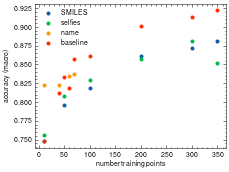

In [240]:
plt.scatter(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["accuracy"]["mean"],
    label="SMILES",
)


plt.scatter(
    compiled_classification_data_agg.loc["selfies"].index,
    compiled_classification_data_agg.loc["selfies"]["accuracy"]["mean"],
    label="selfies",
)

plt.scatter(
    compiled_classification_data_agg.loc["name"].index,
    compiled_classification_data_agg.loc["name"]["accuracy"]["mean"],
    label="name",
)

plt.scatter(
    compiled_baseline_data_agg.index,
    compiled_baseline_data_agg["baseline_accuracy"]["mean"],
    label="baseline",
)

plt.legend()
plt.xlabel('number training points')
plt.ylabel('accuracy (macro)')
plt.tight_layout()
plt.savefig('photoswitch_classification_accuracy.pdf', bbox_inches='tight')

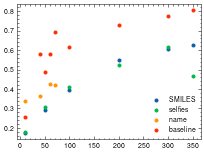

In [241]:
plt.scatter(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["f1_macro"]["mean"],
    label="SMILES",
)


plt.scatter(
    compiled_classification_data_agg.loc["selfies"].index,
    compiled_classification_data_agg.loc["selfies"]["f1_macro"]["mean"],
    label="selfies",
)

plt.scatter(
    compiled_classification_data_agg.loc["name"].index,
    compiled_classification_data_agg.loc["name"]["f1_macro"]["mean"],
    label="name",
)

plt.scatter(
    compiled_baseline_data_agg.index,
    compiled_baseline_data_agg["baseline_f1_macro"]["mean"],
    label="baseline",
)

plt.legend()


In [242]:
compiled_augmentation_data_agg = compiled_augmentation_data.groupby(
    ["representation", "include_canonical", "train_size"]
).agg(["mean", "std", mean_confidence_interval])


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_26009/1640352993.py:1: FutureWarning: ['mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_augmentation_data_agg = compiled_augmentation_data.groupby(


In [243]:
compiled_augmentation_data_agg = compiled_augmentation_data_agg.loc['SMILES']


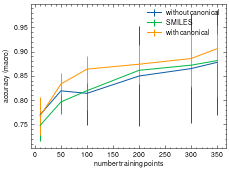

In [244]:


plt.errorbar(
    compiled_augmentation_data_agg.loc["False"].index,
    compiled_augmentation_data_agg.loc["False"]["accuracy"]["mean"],
    yerr=compiled_augmentation_data_agg.loc["False"]["accuracy"]["std"],
    label="without canonical",
)

plt.errorbar(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["accuracy"]["mean"],
    yerr=compiled_classification_data_agg.loc["SMILES"]["accuracy"]["std"],
    label="SMILES",
)

plt.errorbar(
    compiled_augmentation_data_agg.loc["True"].index,
    compiled_augmentation_data_agg.loc["True"]["accuracy"]["mean"],
    yerr=compiled_augmentation_data_agg.loc["True"]["accuracy"]["std"],
    label="with canonical",
)
plt.legend()
plt.xlabel('number training points')
plt.ylabel('accuracy (macro)')
plt.tight_layout()
plt.savefig('photoswitch_classification_accuracy_augmentation.pdf', bbox_inches='tight')

In [245]:
compiled_augmentation_data_agg

accuracy            \
                                  mean       std   
include_canonical train_size                       
False             10          0.769661  0.014577   
                  50          0.818930  0.019127   
                  100         0.813804  0.065353   
                  200         0.849544  0.102517   
                  300         0.864889  0.111625   
                  350         0.877778  0.107779   
True              10          0.767053  0.038951   
                  50          0.833112  0.021626   
                  100         0.863724  0.027859   
                  200         0.873895  0.040318   
                  300         0.885657  0.056081   
                  350         0.906000  0.029889   

                                                                                 \
                                                       mean_confidence_interval   
include_canonical train_size                                                      
False             10          (0.7696608187134503, 0.751561182780369, 0.7877...   
                  50          (0.8189304812834225, 0.795181483463782, 0.8426...   
                  100         (0.8138038513210926, 0.7326578029608614, 0.894...   
                  200         (0.8495438596491228, 0.7222522846557509, 0.976...   
                  300         (0.8648888888888889, 0.7262875539385667, 1.003...   
                  350         (0.8777777777777779, 0.7646707344496448, 0.990...   
True              10          (0.7670526315789474, 0.7391884440329222, 0.794...   
                  50          (0.8331122994652406, 0.817641832159925, 0.8485...   
                  100         (0.8637241379310344, 0.8437948769966687, 0.883...   
                  200         (0.8738947368421053, 0.8450528217746236, 0.902...   
                  300         (0.8856565656565657, 0.8479810052562619, 0.923...   
                  350         (0.9059999999999999, 0.8846189246625586, 0.927...   

                              f1_macro            \
                                  mean       std   
include_canonical train_size                       
False             10          0.244243  0.138918   
                  50          0.207438  0.285759   
                  100         0.251731  0.346853   
                  200         0.555508  0.310875   
                  300         0.617477  0.345539   
                  350         0.614613  0.332220   
True              10          0.189771  0.167048   
                  50          0.457989  0.248173   
                  100         0.568977  0.206845   
                  200         0.561100  0.298861   
                  300         0.544825  0.359849   
                  350         0.750190  0.118481   

                                                                                 \
                                                       mean_confidence_interval   
include_canonical train_size                                                      
False             10          (0.2442429907390838, 0.0717539834814771, 0.416...   
                  50          (0.20743838120938687, -0.14737876706446748, 0....   
                  100         (0.25173065438199665, -0.1789438038325899, 0.6...   
                  200         (0.5555077781742248, 0.16950592242046447, 0.94...   
                  300         (0.6174770651239869, 0.1884335552132198, 1.046...   
                  350         (0.6146130869888992, 0.2659697084643486, 0.963...   
True              10          (0.18977100186504275, 0.07027206438695097, 0.3...   
                  50          (0.45798855145381345, 0.28045634565654465, 0.6...   
                  100         (0.5689773339489149, 0.42100967121798016, 0.71...   
                  200         (0.5610995662253553, 0.34730744918966194, 0.77...   
                  300         (0.544825212343215, 0.30307540404816097, 0.786...   
                  350         (0.7501900987679099, 0.6654335

## Regression

In [248]:
photoswitch_regression_results = glob('results/20220915_photoswitch_regression/*.pkl')

In [250]:
load_pickle(photoswitch_regression_results[0])

{'train_size': 200,
 'test_size': 190,
 'modelname': 'ada:ft-lsmoepfl-2022-09-16-16-39-32',
 'representation': 'SMILES',
 'completions': {'choices': [<OpenAIObject at 0x2ab236bd0> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 438.0@@@@@@@@"
   },
   <OpenAIObject at 0x2ab236cc0> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 330.0@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2ab3617c0> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 330.0@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2ab361450> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 438.0@@@@@@@@"
   },
   <OpenAIObject at 0x2ab361400> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 336.0@@@@@@@@@@@"
   },
   <OpenAIObject at 0x2ab361090> JSON: {
     "finish_reason": "length",
     "index": 5,
     "log

In [259]:
compiled_regression_results = []
compiled_regression_baseline_results = []

for res_file in photoswitch_regression_results:
    res = load_pickle(res_file)
    res_dict = {
        'r2': res['metrics']['r2'],
        'max_error': res['metrics']['max_error'],
        'mean_absolute_error': res['metrics']['mean_absolute_error'],
        'mean_squared_error': res['metrics']['mean_squared_error'],
    }
    res_dict['train_size'] = res['train_size']
    res_dict['representation'] = res['representation']

    baseline_res_dict = res['baseline_metrics']
    baseline_res_dict['train_size'] = res['train_size']

    compiled_regression_results.append(res_dict)
    compiled_regression_baseline_results.append(baseline_res_dict)
    

In [260]:
compiled_regression_results = pd.DataFrame(compiled_regression_results)
compiled_regression_baseline_results = pd.DataFrame(compiled_regression_baseline_results)

In [263]:
compiled_regression_results.groupby(['representation', 'train_size']).agg(['mean', 'std', mean_confidence_interval])['mean_absolute_error']

mean        std mean_confidence_interval
representation train_size                                               
SMILES         10          60.145614   4.860081          (nan, nan, nan)
               50          50.125210   6.578121          (nan, nan, nan)
               100         33.248276   2.596950          (nan, nan, nan)
               200         25.527820   2.558721          (nan, nan, nan)
               300         21.693333   3.090114          (nan, nan, nan)
               350         21.378571   4.575488          (nan, nan, nan)
name           10          45.841270  19.216983          (nan, nan, nan)
               40          31.070076  11.993973          (nan, nan, nan)
               60          29.362500   4.379569          (nan, nan, nan)
               70          27.299383   5.964527          (nan, nan, nan)
selfies        10          57.147368  13.193124          (nan, nan, nan)
               50          48.220588        NaN          (nan, nan, nan)
               100         39.579310        NaN          (nan, nan, nan)
               200         25.952632        NaN          (nan, nan, nan)
               300         28.622222        NaN          (nan, nan, nan)
               350         22.500000   3.372314          (nan, nan, nan)

In [264]:
compiled_regression_baseline_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])['mean_absolute_error']

,mean,std,mean_confidence_interval
train_size,,,
10,40.125906,7.152728,"(nan, nan, nan)"
40,23.258469,2.670975,"(nan, nan, nan)"
50,28.530628,3.016580,"(nan, nan, nan)"
60,22.956633,4.860130,"(nan, nan, nan)"
70,22.758450,5.858217,"(nan, nan, nan)"
100,21.894158,1.826536,"(nan, nan, nan)"
200,15.526524,1.287573,"(nan, nan, nan)"
300,13.479345,1.745767,"(nan, nan, nan)"
350,14.089226,3.266477,"(14.089226044328003, 12.013805687107173, 16.16..."
